# 时间序列数据的基本回归分析
------

## 时间序列数据的性质

**时间序列过程(随机过程)**

一个标有时间脚标的随机变量序列被称为一个随机过程或时间序列过程。

<br>

**时间序列数据的特征**

- 按时间排列

- 时间序列的随机性

- 趋势、季节性、周期性、突变

## 静态模型

假设两个变量的时间序列模型

$$
y_{t}=\beta_{0}+\beta_{1} z_{t}+u_{t}, t=1,2, \ldots, n
$$

例如，静态菲利普斯曲线

$$
i n f_{t}=\beta_{0}+\beta_{1} \text { unem }_{t}+u_{t}
$$

## 有限分布滞后模型

一个二阶FDL

$$
y_{t}=\alpha_{0}+\delta_{0} z_{t}+\delta_{1} z_{t-1}+\delta_{2} z_{t-2}+u_{t}
$$

- 冲击倾向或冲击乘数

- 长期倾向或长期乘数

<br>

**妇女生育决策的例子**

$$gfr_{t} = \alpha_{0} + \delta_{0}pe_{t} + \delta_{1}pe_{t-1} + \delta_{2}pe_{t-2} + \mu_{t}$$

其中$gfr_{t}$是生育率，$pe_{t}$是个人所得税减免的实际美元金额。

In [3]:
use http://fmwww.bc.edu/ec-p/data/wooldridge/fertil3, clear

tsset year



        time variable:  year, 1913 to 1984
                delta:  1 unit


In [4]:
reg gfr pe L.pe L2.pe


      Source |       SS           df       MS      Number of obs   =        70
-------------+----------------------------------   F(3, 66)        =      0.14
       Model |  159.461148         3   53.153716   Prob > F        =    0.9383
    Residual |  25832.9717        66  391.408663   R-squared       =    0.0061
-------------+----------------------------------   Adj R-squared   =   -0.0390
       Total |  25992.4329        69  376.701926   Root MSE        =    19.784

------------------------------------------------------------------------------
         gfr |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          pe |
         --. |  -.0158445    .140256    -0.11   0.910    -.2958747    .2641856
         L1. |  -.0213365   .2152292    -0.10   0.921    -.4510555    .4083826
         L2. |   .0539005   .1381132     0.39   0.698    -.2218513    .3296524
             |
       _cons |   93.

In [5]:
reg gfr pe pe_1 pe_2


      Source |       SS           df       MS      Number of obs   =        70
-------------+----------------------------------   F(3, 66)        =      0.14
       Model |  159.461148         3   53.153716   Prob > F        =    0.9383
    Residual |  25832.9717        66  391.408663   R-squared       =    0.0061
-------------+----------------------------------   Adj R-squared   =   -0.0390
       Total |  25992.4329        69  376.701926   Root MSE        =    19.784

------------------------------------------------------------------------------
         gfr |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          pe |  -.0158445    .140256    -0.11   0.910    -.2958747    .2641856
        pe_1 |  -.0213365   .2152292    -0.10   0.921    -.4510555    .4083826
        pe_2 |   .0539005   .1381132     0.39   0.698    -.2218513    .3296524
       _cons |   93.15791   4.499654    20.70   0.

## 经典假设下OLS的有限样本性质

- 假定TS.1 线性于参数

- 假定TS.2 无完全共线性

- 假定TS.3 零条件均值（严格外生性） $E(\mu_{t}|X)=0$

**例子**

$$mrdrte_{t}=\beta_{0}+\beta_{1} \text { polpc }_{t}+\mu_{t}$$

**无偏性**

在假定TS.1、TS.2和TS.3下，以$X$为条件，OLS估计量是无偏的。

<br>

- 假定TS.4 同方差性 $Var(\mu_{t}|X)=\sigma^{2}$

- 假定TS.5 无序列相关 $Corr(\mu_{t},\mu_{s}|X)=0,\forall t\neq s$

**OLS估计量的方差**

在时间序列高斯—马尔科夫假定TS.1到TS.5下，以$X$为条件，$\hat{\beta}_{j}$的条件方差为

$$\operatorname{Var}\left(\hat{\beta}_{j} | \mathbf{X}\right)=\sigma^{2} /\left[\operatorname{SST}_{j}\left(1-R_{j}^{2}\right)\right]$$

其中，$SST_{j}$是$x_{tj}$的总平方和，$R_{j}^{2}$为由$x_{j}$对所有其他自变量回归得到的$R^{2}$。

**$\sigma^{2}$的无偏估计**

在假定TS.1到TS.5下，估计量$\hat{\sigma}^{2}=SSR/df$是$\sigma^{2}$的一个无偏估计量，其中$df=n-k-1$。

<br>

**时间序列回归的高斯马尔科夫定理**

在假定TS.1到TS.5下，以$X$为条件，OLS估计量是最优线性无偏估计量。

<br>

- 假定TS.6 正态性

**正态抽样分布**

在时间序列的CLM假定TS.1到TS.6下，以$X$为条件，OLS估计量遵循正态分布。而且，在原假设下，单个$t$统计量服从$t$分布，$F$统计量服从$F$分布，通常构造的置信区间也是有效的。

In [6]:
use http://fmwww.bc.edu/ec-p/data/wooldridge/phillips, clear

reg inf unem




      Source |       SS           df       MS      Number of obs   =        49
-------------+----------------------------------   F(1, 47)        =      2.62
       Model |  25.6369575         1  25.6369575   Prob > F        =    0.1125
    Residual |   460.61979        47  9.80042107   R-squared       =    0.0527
-------------+----------------------------------   Adj R-squared   =    0.0326
       Total |  486.256748        48  10.1303489   Root MSE        =    3.1306

------------------------------------------------------------------------------
         inf |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        unem |   .4676257   .2891262     1.62   0.112    -.1140213    1.049273
       _cons |    1.42361   1.719015     0.83   0.412    -2.034602    4.881822
------------------------------------------------------------------------------


## 函数形式、虚拟变量和指数

In [7]:
use http://fmwww.bc.edu/ec-p/data/wooldridge/fertil3, clear

reg gfr pe ww2 pill




      Source |       SS           df       MS      Number of obs   =        72
-------------+----------------------------------   F(3, 68)        =     20.38
       Model |  13183.6215         3  4394.54049   Prob > F        =    0.0000
    Residual |  14664.2739        68  215.651087   R-squared       =    0.4734
-------------+----------------------------------   Adj R-squared   =    0.4502
       Total |  27847.8954        71  392.223879   Root MSE        =    14.685

------------------------------------------------------------------------------
         gfr |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          pe |     .08254   .0296462     2.78   0.007     .0233819    .1416981
         ww2 |   -24.2384   7.458253    -3.25   0.002    -39.12111   -9.355684
        pill |  -31.59403   4.081068    -7.74   0.000    -39.73768   -23.45039
       _cons |   98.68176   3.208129    30.76   

In [8]:
reg gfr pe ww2 pill pe_1 pe_2

test pe_1 pe_2



      Source |       SS           df       MS      Number of obs   =        70
-------------+----------------------------------   F(5, 64)        =     12.73
       Model |  12959.7886         5  2591.95772   Prob > F        =    0.0000
    Residual |  13032.6443        64  203.635067   R-squared       =    0.4986
-------------+----------------------------------   Adj R-squared   =    0.4594
       Total |  25992.4329        69  376.701926   Root MSE        =     14.27

------------------------------------------------------------------------------
         gfr |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          pe |   .0726718   .1255331     0.58   0.565    -.1781094     .323453
         ww2 |   -22.1265   10.73197    -2.06   0.043    -43.56608   -.6869196
        pill |  -31.30499   3.981559    -7.86   0.000    -39.25907   -23.35091
        pe_1 |  -.0057796   .1556629    -0.04   0

In [9]:
display _b[pe]+_b[pe_1]+_b[pe_2]

.10071909


- 事件研究（Event Study）

$$
R_{t}^{f}=\beta_{0}+\beta_{1} R_{t}^{m}+\beta_{2} d_{t}+u_{t}
$$

<br>

- 指数，例如工业生产指数（IIP）和消费者价格指数（CPI）

对于CPI，如果$w$代表以名义美元度量的工资率，由于$p=\mathrm{CPI} / 100$，那么真实工资率就是$w / p$。

- 真实值变量和自然对数结合使用

$$
\log (\text { hours })=\beta_{0}+\beta_{1} \log (w / p)+u
$$

上式可以写为

$$
\log (\text { hours })=\beta_{0}+\beta_{1} \log (w)+\beta_{2} \log (p)+u
$$

这里可以检验约束$\beta_{2}=-\beta_{1}$，若成立表示只有真实工资才影响劳动供给。

## 趋势和季节性

### 描述有趋势的时间序列

- 线性时间趋势

$$
y_{t}=\alpha_{0}+\alpha_{1} t+e_{t}, t=1,2, \ldots
$$

其中$\left\{e_{t}\right\}$是独立同分布（iid）序列，且$\mathrm{E}\left(e_{t}\right)=0$和$\operatorname{Var}\left(e_{t}\right)=\sigma_{e}^{2}$。

- 指数趋势

$$
\log \left(y_{t}\right)=\beta_{0}+\beta_{1} t+e_{t}, t=1,2, \ldots
$$

### 在回归分析中使用趋势变量

- 伪回归问题

In [10]:
use http://fmwww.bc.edu/ec-p/data/wooldridge/hseinv, clear

reg linvpc lprice




      Source |       SS           df       MS      Number of obs   =        42
-------------+----------------------------------   F(1, 40)        =     10.53
       Model |  .254364572         1  .254364572   Prob > F        =    0.0024
    Residual |  .966255373        40  .024156384   R-squared       =    0.2084
-------------+----------------------------------   Adj R-squared   =    0.1886
       Total |  1.22061994        41  .029771218   Root MSE        =    .15542

------------------------------------------------------------------------------
      linvpc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      lprice |   1.240944   .3824192     3.24   0.002     .4680455    2.013842
       _cons |  -.5502345   .0430266   -12.79   0.000    -.6371945   -.4632745
------------------------------------------------------------------------------


In [11]:
reg linvpc lprice t


      Source |       SS           df       MS      Number of obs   =        42
-------------+----------------------------------   F(2, 39)        =     10.08
       Model |  .415945135         2  .207972568   Prob > F        =    0.0003
    Residual |  .804674809        39  .020632687   R-squared       =    0.3408
-------------+----------------------------------   Adj R-squared   =    0.3070
       Total |  1.22061994        41  .029771218   Root MSE        =    .14364

------------------------------------------------------------------------------
      linvpc |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
      lprice |  -.3809609   .6788352    -0.56   0.578    -1.754035     .992113
           t |   .0098287   .0035122     2.80   0.008     .0027246    .0169328
       _cons |  -.9130595   .1356134    -6.73   0.000    -1.187363   -.6387556
--------------------------------------------------



        time variable:  year, 1913 to 1984
                delta:  1 unit


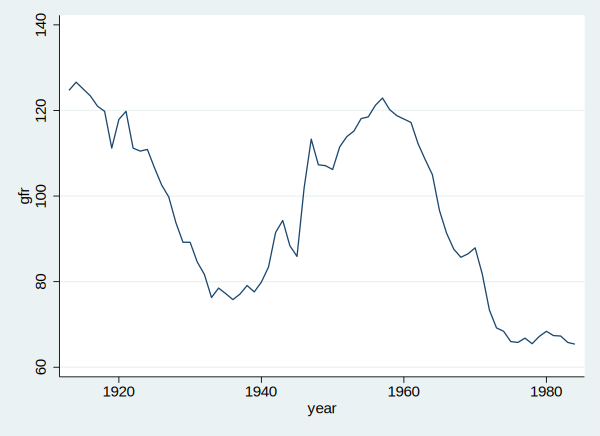

In [15]:
use http://fmwww.bc.edu/ec-p/data/wooldridge/fertil3, clear

tsset year

tsline gfr

In [16]:
reg gfr pe ww2 pill t


      Source |       SS           df       MS      Number of obs   =        72
-------------+----------------------------------   F(4, 67)        =     32.84
       Model |  18441.2357         4  4610.30894   Prob > F        =    0.0000
    Residual |  9406.65967        67  140.397905   R-squared       =    0.6622
-------------+----------------------------------   Adj R-squared   =    0.6420
       Total |  27847.8954        71  392.223879   Root MSE        =    11.849

------------------------------------------------------------------------------
         gfr |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          pe |   .2788778   .0400199     6.97   0.000     .1989978    .3587578
         ww2 |  -35.59228   6.297377    -5.65   0.000     -48.1619   -23.02266
        pill |   .9974479    6.26163     0.16   0.874    -11.50082    13.49571
           t |  -1.149872   .1879038    -6.12   0.

In [17]:
reg gfr pe ww2 pill t tsq


      Source |       SS           df       MS      Number of obs   =        72
-------------+----------------------------------   F(5, 66)        =     35.09
       Model |  20236.3981         5  4047.27961   Prob > F        =    0.0000
    Residual |  7611.49734        66  115.325717   R-squared       =    0.7267
-------------+----------------------------------   Adj R-squared   =    0.7060
       Total |  27847.8954        71  392.223879   Root MSE        =    10.739

------------------------------------------------------------------------------
         gfr |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
          pe |   .3478126   .0402599     8.64   0.000     .2674311     .428194
         ww2 |  -35.88028   5.707921    -6.29   0.000    -47.27651   -24.48404
        pill |  -10.11972   6.336094    -1.60   0.115    -22.77014    2.530696
           t |  -2.531426   .3893863    -6.50   0.

### 对含时间趋势回归的除趋势解释

例如下述拟合方程

$$
\hat{y}_{t}=\hat{\beta}_{0}+\hat{\beta}_{1} x_{t 1}+\hat{\beta}_{2} x_{t 2}+\hat{\beta}_{3} t
$$

可以由如下方式的得到估计值

（1）将$y_{t}$、$x_{t1}$和$x_{t2}$分别对常数项和时间趋势$t$回归，并记录残差$\ddot{y}_{t}$、$\ddot{x}_{t1}$和$\ddot{x}_{t2}$，例如

$$
\ddot{y}_{t}=y_{t}-\hat{\alpha}_{0}-\hat{\alpha}_{1} t
$$

（2）做$\ddot{y}_{t}$对$\ddot{x}_{t1}$和$\ddot{x}_{t2}$的回归

### 因变量有趋势时拟合优度的计算

可以使用

$$
1-\frac{\mathrm{SSR}}{\sum_{t=1}^{n} \dot{y}_{t}^{2}}
$$

### 季节性

使用虚拟变量进行季节调整

例如

$$
\begin{aligned}
y_{t}=& \beta_{0}+\delta_{1} f e b_{t}+\delta_{2} m a r_{t}+\delta_{3} a p r_{t}+\cdots+\delta_{11} d e c_{t} \\
&+\beta_{1} x_{t 1}+\cdots+\beta_{k} x_{t k}+u_{t}
\end{aligned}
$$